In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Cargar archivo csv desde seaborn
df=pd.read_csv('projectos_forvia.csv')
df.head(5)

,Number,Active,Project Name,Project Type,Geographical scope,Project manager,State,Percent complete,Project size,Project organization,...,Closed,Domain,Domain Path,Last WAR,Project Health,Project type,Recurrent activity,Planned start date,Actual start date,On-hold
0,PRJ0075198,VERDADERO,TCO - FIS - ABRERA - VW210 IP,Shopfloor JIT/TCO,ABRERA FIS,BENAVENT Pablo,Work in progress,26.47,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075304,Green,Regular,FALSO,1/2/2025 17:01,NaN,FALSO
1,PRJ0073962,VERDADERO,TCO - FCM - ALLENJOIE FHS - GEN2 New automated...,Shopfloor JIT/TCO,ALLENJOIE FCM,MAUVAIS Julien,Work in progress,52.17,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075248,Yellow,Regular,FALSO,18/01/2024 08:00:00,18/01/2024 08:00:00,VERDADERO
2,PRJ0074556,VERDADERO,TCO - FCM - ALLENJOIE FHS - Tank XL,Shopfloor JIT/TCO,ALLENJOIE FHS,THIERY Jean-Francois,Work in progress,95.85,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075265,Yellow,Regular,FALSO,12/8/2024 8:00,12/8/2024 8:00,FALSO
3,PRJ0075087,VERDADERO,TCO - FCM - ALLENJOIE FHS - STELLANTIS - XL694...,Shopfloor JIT/TCO,ALLENJOIE FHS,MAUVAIS Julien,Work in progress,20.90,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075325,Green,Regular,FALSO,8/1/2025 8:00,15/01/2025 09:52:03,VERDADERO
4,PRJ0075456,VERDADERO,TCO – FCM - ALMUSSAFES - FORD - C482 Welding l...,Shopfloor JIT/TCO,ALMUSSAFES FCM,BENAVENT Pablo,Work in progress,24.30,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075307,Green,Regular,FALSO,12/5/2025 8:00,12/5/2025 8:00,FALSO


In [4]:
df = df.drop(['Actual end date', 'Closed', 'Project target phase', 'Actual Go Live date'],axis=1)

valores_nulos = df.isnull().sum()
valores_nulos

Number                   1
Active                   1
Project Name             1
Project Type             1
Geographical scope       1
Project manager          1
State                    1
Percent complete         1
Project size             1
Project organization     1
Planned Go Live date     1
BG                       1
Domain                   1
Domain Path              1
Last WAR                14
Project Health          14
Project type             1
Recurrent activity       1
Planned start date       0
Actual start date       19
On-hold                  1
dtype: int64

In [5]:
df["Number"] =df["Number"].fillna("No description available")
df["Active"] =df["Active"].fillna("No description available")
df["Project Name"] =df["Project Name"].fillna("No Name")
df["Project Type"] =df["Project Type"].fillna("No description available")
df["Geographical scope"] =df["Geographical scope"].fillna("No description available")
df["Project manager"] =df["Project manager"].fillna("No description available")
df["State"] =df["State"].fillna("Not available")
df["Project size"] =df["Project size"].fillna("Not available")
df["Project organization"] =df["Project organization"].fillna("Not available")
df["Planned Go Live date"] =df["Planned Go Live date"].fillna("Not available")
df["BG"] =df["BG"].fillna("Not available")
df["Domain"] =df["Domain"].fillna("No description available")
df["Domain Path"] =df["Domain Path"].fillna("/")
df["Last WAR"] =df["Last WAR"].fillna("No description available")
df["Project Health"] =df["Project Health"].fillna("No color available")
df["Project type"] =df["Project type"].fillna("Regular")
df["Recurrent activity"] =df["Recurrent activity"].fillna("FALSO")
df["Actual start date"] =df["Actual start date"].fillna("NO DATE REGISTERED")
df["On-hold"] =df["On-hold"].fillna("No description available")
df['Percent complete'] = df['Percent complete'].fillna(0)

In [6]:
# Verificar que no hay valores nulos en el DataFrame
print(df.isnull().sum())

Number                  0
Active                  0
Project Name            0
Project Type            0
Geographical scope      0
Project manager         0
State                   0
Percent complete        0
Project size            0
Project organization    0
Planned Go Live date    0
BG                      0
Domain                  0
Domain Path             0
Last WAR                0
Project Health          0
Project type            0
Recurrent activity      0
Planned start date      0
Actual start date       0
On-hold                 0
dtype: int64


In [7]:
lista_cambio = ['Project Type','Geographical scope','Project manager','State','Project size','Project organization','BG','Project Health','On-hold']

In [8]:
#Obtengo un análisis univariado de las variables categóricas
n=0
for col in lista_cambio:
    Tabla_freq = df[col].value_counts()
    mapeo = {cat: i+1 for i, cat in enumerate(Tabla_freq.index.unique())}
    # print(mapeo)
    df[col] = df[col].map(mapeo)
    # df[col] = pd.factorize(df[col][0+n])
    # n+=1
    
print (df[lista_cambio])

     Project Type  Geographical scope  Project manager  State  Project size  \
0               1                  63                2      1             3   
1               1                  62               15      1             2   
2               1                  51               20      1             1   
3               1                  51               15      1             3   
4               1                  61                2      1             1   
..            ...                 ...              ...    ...           ...   
241             6                  43              119      1             2   
242             8                 126               27      1             1   
243             8                  42               27      1             1   
244             1                  42              120      1             3   
245            12                 127              121      4             4   

     Project organization  BG  Project Health  On-h

In [9]:
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

Tabla_numericas = df[lista_cambio]
Tabla_numericas["Percent complete"] = df.loc[:, ["Percent complete"]]
print(Tabla_numericas)
# print(cuantitativas)
# print(cualitativas)
# cuantitativas.head()
# variables_categoricas_num = ['Project Type','State','Percent complete', 'Project size', 'Project organization']

     Project Type  Geographical scope  Project manager  State  Project size  \
0               1                  63                2      1             3   
1               1                  62               15      1             2   
2               1                  51               20      1             1   
3               1                  51               15      1             3   
4               1                  61                2      1             1   
..            ...                 ...              ...    ...           ...   
241             6                  43              119      1             2   
242             8                 126               27      1             1   
243             8                  42               27      1             1   
244             1                  42              120      1             3   
245            12                 127              121      4             4   

     Project organization  BG  Project Health  On-h

C:\Users\dorop\AppData\Local\Temp\ipykernel_8420\1251541806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_numericas["Percent complete"] = df.loc[:, ["Percent complete"]]


Estas variables fueron elegidas porque permiten segmentar los proyectos según criterios clave de gestión, éxito, estado y pertenencia. Al convertirlas en dicotómicas, facilitas el análisis estadístico, la modelación y la visualización, permitiendo identificar patrones, riesgos y oportunidades de mejora en la gestión de proyectos.

In [10]:
# Selección y justificación de variables dicotómicas:
# 1. State: Indica si el proyecto está activo (1) o no (0). Importante para saber si el proyecto sigue vigente.
# 2. Project Health: Indica si el proyecto está en buen estado (1) o no (0). Relevante para análisis de éxito.
# 3. On-hold: Indica si el proyecto está en pausa (1) o no (0). Útil para identificar proyectos detenidos.
# 4. Project Type: Se puede dicotomizar para identificar si es del tipo más frecuente (1) o no (0).
# 5. BG: Se puede dicotomizar para identificar si pertenece al BG más frecuente (1) o no (0).

# Obtener las categorías más frecuentes
most_freq_type = df['Project Type'].mode()[0]
most_freq_bg = df['BG'].mode()[0]
most_freq_state = df['State'].mode()[0]
most_freq_health = df['Project Health'].mode()[0]
most_freq_onhold = df['On-hold'].mode()[0]

# Crear variables dicotómicas correctamente
# 1. State_Activo
# 2. ProjectHealth_Bueno
# 3. OnHold
# 4. ProjectType_MasFrecuente
# 5. BG_MasFrecuente
df['State_Activo'] = np.where(df['State'] == most_freq_state, 1, 0)
df['ProjectHealth_Bueno'] = np.where(df['Project Health'] == most_freq_health, 1, 0)
df['OnHold'] = np.where(df['On-hold'] == most_freq_onhold, 1, 0)
df['ProjectType_MasFrecuente'] = np.where(df['Project Type'] == most_freq_type, 1, 0)
df['BG_MasFrecuente'] = np.where(df['BG'] == most_freq_bg, 1, 0)

# Crear nuevo DataFrame limpio con las 5 variables dicotómicas
nuevo_df = df[['State_Activo', 'ProjectHealth_Bueno', 'OnHold', 'ProjectType_MasFrecuente', 'BG_MasFrecuente']].copy()

# Mostrar el nuevo DataFrame limpio
print(nuevo_df.head())

   State_Activo  ProjectHealth_Bueno  OnHold  ProjectType_MasFrecuente  \
0             1                    1       1                         1   
1             1                    0       0                         1   
2             1                    0       1                         1   
3             1                    1       0                         1   
4             1                    1       1                         1   

   BG_MasFrecuente  
0                1  
1                0  
2                0  
3                0  
4                0  


In [11]:
# Mostrar el umbral de cada variable
print('Umbral State:', most_freq_state)
print('Umbral Project Health:', most_freq_health)
print('Umbral On-hold:', most_freq_onhold)
print('Umbral Project Type:', most_freq_type)
print('Umbral BG:', most_freq_bg)

Umbral State: 1
Umbral Project Health: 1
Umbral On-hold: 1
Umbral Project Type: 1
Umbral BG: 1


State_Activo: Saber si un proyecto está activo es fundamental para cualquier análisis de gestión de proyectos. Los proyectos activos suelen requerir recursos, atención y seguimiento, mientras que los inactivos pueden estar cerrados, pausados o cancelados. Esta variable permite separar claramente los proyectos vigentes de los que no lo están.
ProjectHealth_Bueno

ProjectHealth_Bueno: El estado de salud del proyecto es un indicador directo de éxito o riesgo. Un proyecto “bueno” implica que está cumpliendo objetivos, dentro de tiempo y presupuesto, y sin problemas graves. Dicotomizar esta variable ayuda a identificar rápidamente los proyectos exitosos frente a los que requieren intervención.
OnHold

OnHold: Los proyectos en pausa (“on hold”) pueden indicar problemas, falta de recursos, cambios de prioridad o bloqueos externos. Es importante distinguirlos porque suelen tener dinámicas y necesidades diferentes a los proyectos activos o cerrados. Esta variable permite identificar y analizar los factores que llevan a poner proyectos en pausa.
ProjectType_MasFrecuente

ProjectType_MasFrecuente: El tipo de proyecto más frecuente representa el “core” o el enfoque principal de la organización. Dicotomizar esta variable permite comparar los proyectos típicos con los atípicos, lo que puede revelar diferencias en resultados, riesgos o necesidades de gestión.
BG_MasFrecuente

BG_MasFrecuente: El BG (Business Group) más frecuente indica el área de negocio dominante en la base de datos. Analizar si un proyecto pertenece o no al grupo principal ayuda a entender si existen diferencias en desempeño, recursos o resultados entre el grupo dominante y los demás.

In [12]:
# Unir el df de las variables dicotómicas con el df de sin valores nulos
df_limpio = pd.concat([nuevo_df, Tabla_numericas], axis=1)
print(df_limpio.head())     

   State_Activo  ProjectHealth_Bueno  OnHold  ProjectType_MasFrecuente  \
0             1                    1       1                         1   
1             1                    0       0                         1   
2             1                    0       1                         1   
3             1                    1       0                         1   
4             1                    1       1                         1   

   BG_MasFrecuente  Project Type  Geographical scope  Project manager  State  \
0                1             1                  63                2      1   
1                0             1                  62               15      1   
2                0             1                  51               20      1   
3                0             1                  51               15      1   
4                0             1                  61                2      1   

   Project size  Project organization  BG  Project Health  On-hold  \
0   

In [13]:
# Dime los valores nulos que tiene este nuevo df
valores_nulos_limpio = df_limpio.isnull().sum()
print(valores_nulos_limpio) 

State_Activo                0
ProjectHealth_Bueno         0
OnHold                      0
ProjectType_MasFrecuente    0
BG_MasFrecuente             0
Project Type                0
Geographical scope          0
Project manager             0
State                       0
Project size                0
Project organization        0
BG                          0
Project Health              0
On-hold                     0
Percent complete            0
dtype: int64


***1:State: 'State_Activo'***

In [158]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[[ 'Project Health','On-hold','Percent complete']]
Var_Dep= df['State_Activo']

In [159]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [160]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [161]:
#Se escalan todos los datos
escalar = StandardScaler()

In [162]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [163]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [164]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [165]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [138]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 2  1]
 [ 2 69]]


In [139]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9857142857142858


In [140]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9594594594594594


In [141]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.971830985915493


In [142]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.9787234042553191


Balanceo 

In [124]:
#Aplicamos la técnica de sobremuestreo (oversampling)
from imblearn.over_sampling import SMOTE

In [143]:
#Aplicamos la técnica de sobremuestreo (oversampling)
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [144]:
#Entrenamos el modelo sobremuestreado
algoritmo_Over_sampling = LogisticRegression()
algoritmo_Over_sampling.fit(X_resampled, y_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [145]:
#Realizamos una predicción
y_pred_over_sampling = algoritmo_Over_sampling.predict(X_test) 
y_pred_over_sampling

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [146]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz_1_balanceado = confusion_matrix(y_test, y_pred_over_sampling)
print('Matriz de Confusión:')
print(matriz_1_balanceado)

Matriz de Confusión:
[[ 2  1]
 [ 8 63]]


In [147]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_over_sampling, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.984375


In [148]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred_over_sampling)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.8783783783783784


In [149]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred_over_sampling, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.8873239436619719


***2:Project Health: 'ProjectHealth_Bueno'***

In [35]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep2= df[['Project manager', 'Project size'	,'On-hold']]
Var_Dep2= df['ProjectHealth_Bueno']

In [36]:
#Redefinimos las variables 
X2= Vars_Indep2
y2= Var_Dep2

In [37]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.3, random_state =None)

In [38]:
#Se escalan todos los datos
escalar2 = StandardScaler()

In [39]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train2 = escalar2.fit_transform(X_train2)
X_test2 = escalar2.transform(X_test2)

In [40]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo2 = LogisticRegression()

In [41]:
#Entrenamos el modelo
algoritmo2.fit(X_train2, y_train2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
#Realizamos una predicción
y_pred2 = algoritmo2.predict(X_test2) 
y_pred2

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1])

In [43]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y_test2, y_pred2)
print('Matriz de Confusión:')
print(matriz2)

Matriz de Confusión:
[[ 1 18]
 [ 2 53]]


In [44]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision2 = precision_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision2)

Precisión del modelo:
0.7464788732394366


In [45]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y_test2, y_pred2)
print('Exactitud del modelo:')
print(exactitud2)

Exactitud del modelo:
0.7297297297297297


In [46]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef2 = f1_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef2)

Puntaje F1 del modelo:
0.8412698412698413


***3:On hold: OnHold***

In [47]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep3= df[['Project Type','Project manager' ,'Project organization']]
Var_Dep3= df['OnHold']

In [48]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep3= df[['Project Health','State' ,'Geographical scope']]
Var_Dep3= df['OnHold']

In [49]:
#Redefinimos las variables 
X3= Vars_Indep3
y3= Var_Dep3

In [50]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state =None)

In [51]:
#Se escalan todos los datos
escalar3 = StandardScaler()

In [52]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train3 = escalar3.fit_transform(X_train3)
X_test3 = escalar3.transform(X_test3)

In [53]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo3 = LogisticRegression()

In [54]:
#Entrenamos el modelo
algoritmo3.fit(X_train3, y_train3)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
#Realizamos una predicción
y_pred3 = algoritmo3.predict(X_test3) 
y_pred3

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz3 = confusion_matrix(y_test3, y_pred3)
print('Matriz de Confusión:')
print(matriz3)

Matriz de Confusión:
[[ 2 11]
 [ 1 60]]


In [57]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision3 = precision_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision3)

Precisión del modelo:
0.8450704225352113


In [58]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud3 = accuracy_score(y_test3, y_pred3)
print('Exactitud del modelo:')
print(exactitud3)

Exactitud del modelo:
0.8378378378378378


In [59]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef3 = f1_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef3)

Puntaje F1 del modelo:
0.9090909090909091


Project Type: ProjectType_MasFrecuente

In [60]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep4= df[['Project Health', 'Project size', 'BG']]
Var_Dep4= df['ProjectType_MasFrecuente']

In [61]:
#Redefinimos las variables 
X4= Vars_Indep4
y4= Var_Dep4

In [62]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state =None)

In [63]:
#Se escalan todos los datos
escalar4 = StandardScaler()

In [64]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train4 = escalar4.fit_transform(X_train4)
X_test4 = escalar4.transform(X_test4)

In [65]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo4 = LogisticRegression()

In [66]:
#Entrenamos el modelo
algoritmo4.fit(X_train4, y_train4)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [67]:
#Realizamos una predicción
y_pred4 = algoritmo4.predict(X_test4) 
y_pred4

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0])

In [68]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz4 = confusion_matrix(y_test4, y_pred4)
print('Matriz de Confusión:')
print(matriz4)

Matriz de Confusión:
[[41  5]
 [13 15]]


In [69]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision4 = precision_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision4)

Precisión del modelo:
0.75


In [70]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud4 = accuracy_score(y_test4, y_pred4)
print('Exactitud del modelo:')
print(exactitud4)

Exactitud del modelo:
0.7567567567567568


In [71]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef4 = f1_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef4)

Puntaje F1 del modelo:
0.625


BG: 'BG_MasFrecuente'

In [72]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep5= df[['Project manager','Project organization', 'Project Type']]
Var_Dep5= df['BG_MasFrecuente']

In [73]:
#Redefinimos las variables 
X5= Vars_Indep5
y5= Var_Dep5

In [74]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3, random_state =None)

In [75]:
#Se escalan todos los datos
escalar5 = StandardScaler()

In [76]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train5 = escalar5.fit_transform(X_train5)
X_test5 = escalar5.transform(X_test5)

In [77]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo5 = LogisticRegression()

In [78]:
#Entrenamos el modelo
algoritmo5.fit(X_train5, y_train5)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [79]:
#Realizamos una predicción
y_pred5 = algoritmo5.predict(X_test5) 
y_pred5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz5 = confusion_matrix(y_test5, y_pred5)
print('Matriz de Confusión:')
print(matriz5)

Matriz de Confusión:
[[49  0]
 [25  0]]


In [81]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision5 = precision_score(y_test5, y_pred5, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision5)

Precisión del modelo:
0.0


c:\Users\dorop\anaconda3\envs\Analitica\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [82]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud5 = accuracy_score(y_test5, y_pred5)
print('Exactitud del modelo:')
print(exactitud5)

Exactitud del modelo:
0.6621621621621622


In [83]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef5 = f1_score(y_test5, y_pred5, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef5)

Puntaje F1 del modelo:
0.0


Balanceo 

In [84]:
#Aplicamos la técnica de sobremuestreo (oversampling)
from imblearn.over_sampling import SMOTE

In [85]:
#Aplicamos la técnica de sobremuestreo (oversampling)
from imblearn.over_sampling import SMOTE

smote5 = SMOTE()
X_resampled5, y_resampled5 = smote5.fit_resample(X_train5, y_train5)

In [86]:
#Entrenamos el modelo sobremuestreado
algoritmo_Over_sampling5 = LogisticRegression()
algoritmo_Over_sampling5.fit(X_resampled5, y_resampled5)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [87]:
#Realizamos una predicción
y_pred_over_sampling5 = algoritmo_Over_sampling5.predict(X_test5) 
y_pred_over_sampling5

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1])

In [88]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz_5_balanceado = confusion_matrix(y_test5, y_pred_over_sampling5)
print('Matriz de Confusión:')
print(matriz_5_balanceado)

Matriz de Confusión:
[[23 26]
 [ 8 17]]


In [89]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision5 = precision_score(y_test5, y_pred_over_sampling5, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision5)

Precisión del modelo:
0.3953488372093023


In [90]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud5 = accuracy_score(y_test5, y_pred_over_sampling5)
print('Exactitud del modelo:')
print(exactitud5)

Exactitud del modelo:
0.5405405405405406


In [91]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad5 = recall_score(y_test5, y_pred_over_sampling5, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad5)

Sensibilidad del modelo:
0.68


***Matriz***

In [92]:
# CÁLCULO DE MATRICES DE CONFUSIÓN PARA LOS 5 MODELOS

from sklearn.metrics import confusion_matrix
import numpy as np 

# Asegúrese de que las siguientes variables de prueba y predicción estén disponibles:
# y_test, y_pred, y_test_RL1 (para balanceo), y_pred_over_sampling_RL1 (para balanceo)
# y_test2, y_pred2
# y_test3, y_pred3
# y_test4, y_pred4
# y_test5, y_pred5, y_test_RL5 (para balanceo), y_pred_over_sampling_RL5 (para balanceo)

print("CALCULANDO MATRICES DE CONFUSIÓN (Ajustado para Modelos 1 y 5 Balanceados)")

# =================================================================
# 1. CÁLCULO DE MATRICES DE CONFUSIÓN
# =================================================================

# Modelo 1: State_Activo (Sin balanceo)
matriz_1 = confusion_matrix(y_test, y_pred) 

# Modelo 1: State_Activo (Balanceado)
matriz_1_balanceado = confusion_matrix(y_test, y_pred_over_sampling) 

# Modelo 2: ProjectHealth_Bueno
matriz_2 = confusion_matrix(y_test2, y_pred2)

# Modelo 3: OnHold
matriz_3 = confusion_matrix(y_test3, y_pred3)

# Modelo 4: ProjectType_MasFrecuente
matriz_4 = confusion_matrix(y_test4, y_pred4) 

# Modelo 5: BG_MasFrecuente (Sin balanceo)
matriz_5 = confusion_matrix(y_test5, y_pred5)

# Modelo 5: BG_MasFrecuente (Balanceado)
matriz_5_balanceado = confusion_matrix(y_test5, y_pred_over_sampling5) 

print("Matrices de confusión calculadas")

# =================================================================
# 2. EXTRACCIÓN DE MÉTRICAS CLAVE
# =================================================================

print("\nEXTRAYENDO MÉTRICAS DE MATRICES")

# ** Modelo 1: State_Activo (Sin balanceo) **
True_Positives_1 = matriz_1[1, 1] 
True_Negatives_1 = matriz_1[0, 0] 
False_positives_1 = matriz_1[0, 1]
False_Negatives_1 = matriz_1[1, 0]

# ** Modelo 1: State_Activo (Balanceado) **
True_Positives_1b = matriz_1_balanceado[1, 1] 
True_Negatives_1b = matriz_1_balanceado[0, 0] 
False_positives_1b = matriz_1_balanceado[0, 1]
False_Negatives_1b = matriz_1_balanceado[1, 0]

# ** Modelo 2: ProjectHealth_Bueno **
True_Positives_2 = matriz_2[1, 1]
True_Negatives_2 = matriz_2[0, 0]
False_positives_2 = matriz_2[0, 1]
False_Negatives_2 = matriz_2[1, 0]

# ** Modelo 3: OnHold **
True_Positives_3 = matriz_3[1, 1]
True_Negatives_3 = matriz_3[0, 0]
False_positives_3 = matriz_3[0, 1]
False_Negatives_3 = matriz_3[1, 0]

# ** Modelo 4: ProjectType_MasFrecuente **
True_Positives_4 = matriz_4[1, 1]
True_Negatives_4 = matriz_4[0, 0]
False_positives_4 = matriz_4[0, 1]
False_Negatives_4 = matriz_4[1, 0]

# ** Modelo 5: BG_MasFrecuente (Sin balanceo) **
True_Positives_5 = matriz_5[1, 1]
True_Negatives_5 = matriz_5[0, 0]
False_positives_5 = matriz_5[0, 1]
False_Negatives_5 = matriz_5[1, 0]

# ** Modelo 5: BG_MasFrecuente (Balanceado) **
True_Positives_5b = matriz_5_balanceado[1, 1]
True_Negatives_5b = matriz_5_balanceado[0, 0]
False_positives_5b = matriz_5_balanceado[0, 1]
False_Negatives_5b = matriz_5_balanceado[1, 0]

print("Extracción de métricas completada.")

CALCULANDO MATRICES DE CONFUSIÓN (Ajustado para Modelos 1 y 5 Balanceados)
Matrices de confusión calculadas

EXTRAYENDO MÉTRICAS DE MATRICES
Extracción de métricas completada.


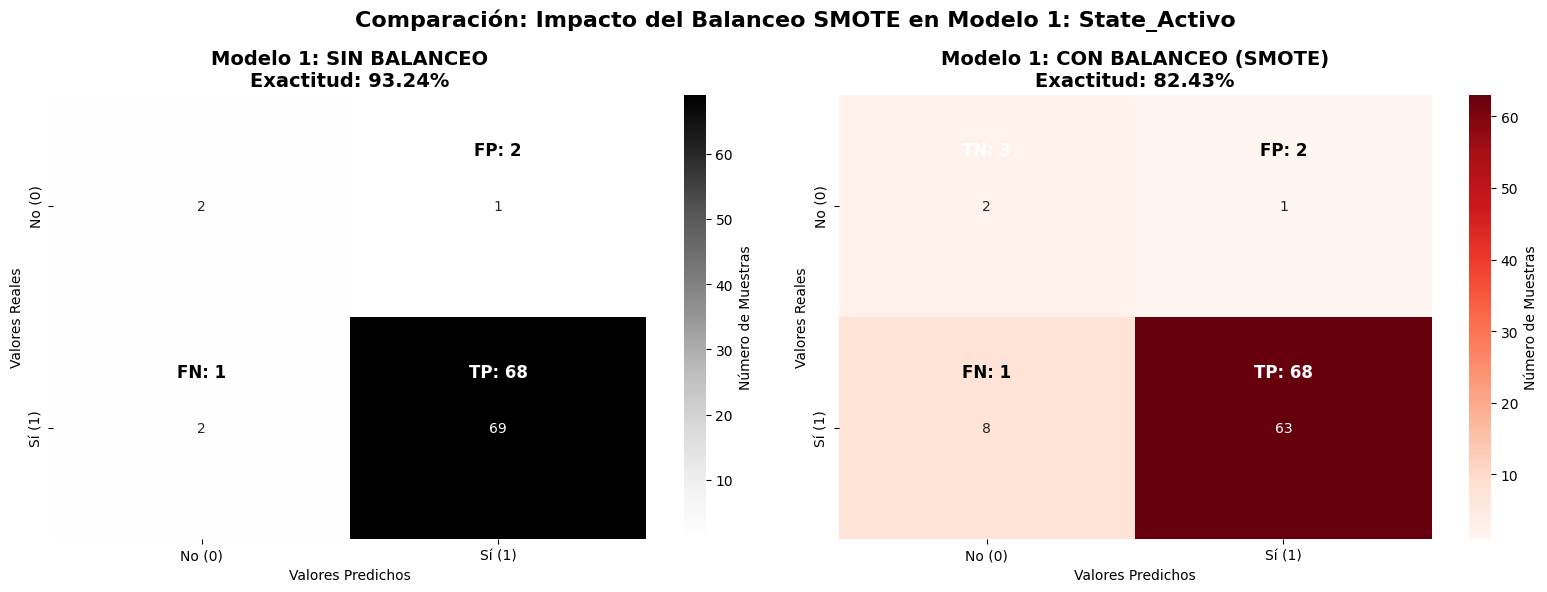

 ANÁLISIS DEL IMPACTO DEL BALANCEO: State_Activo
•Variables predictoras: Project Health , On-hold , Percent complete
• Sin balanceo - Exactitud: 93.24%
• Con balanceo - Exactitud: 82.43%
• Mejora en exactitud: -10.81 puntos porcentuales
• Sensibilidad sin balanceo: 97.18%
• Sensibilidad con balanceo: 85.92%


In [166]:
# COMPARACIÓN: MODELO 1 SIN BALANCEO vs CON BALANCEO State_Activo

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Modelo 1 sin balanceo
sns.heatmap(matriz, annot=True, fmt="d", cmap="Greys", ax=ax1,
            cbar_kws={'label': 'Número de Muestras'})
ax1.text(0.5, 0.25, f'TN: {True_Negatives_1:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax1.text(1.5, 0.25, f'FP: {False_positives_1:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax1.text(0.5, 1.25, f'FN: {False_Negatives_1:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax1.text(1.5, 1.25, f'TP: {True_Positives_1:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax1.set_title('Modelo 1: SIN BALANCEO\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test, y_pred)*100), fontsize=14, fontweight='bold')
ax1.set_xlabel('Valores Predichos')
ax1.set_ylabel('Valores Reales')
ax1.set_xticklabels(['No (0)', 'Sí (1)'])
ax1.set_yticklabels(['No (0)', 'Sí (1)'])

# Modelo 4 con balanceo
sns.heatmap(matriz_1_balanceado, annot=True, fmt="d", cmap="Reds", ax=ax2,
            cbar_kws={'label': 'Número de Muestras'})
ax2.text(0.5, 0.25, f'TN: {True_Negatives_1b:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax2.text(1.5, 0.25, f'FP: {False_positives_1b:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax2.text(0.5, 1.25, f'FN: {False_Negatives_1b:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax2.text(1.5, 1.25, f'TP: {True_Positives_1b:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax2.set_title('Modelo 1: CON BALANCEO (SMOTE)\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test, y_pred_over_sampling)*100), fontsize=14, fontweight='bold')
ax2.set_xlabel('Valores Predichos')
ax2.set_ylabel('Valores Reales')
ax2.set_xticklabels(['No (0)', 'Sí (1)'])
ax2.set_yticklabels(['No (0)', 'Sí (1)'])

plt.suptitle('Comparación: Impacto del Balanceo SMOTE en Modelo 1: State_Activo', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(" ANÁLISIS DEL IMPACTO DEL BALANCEO: State_Activo")
print(f"•Variables predictoras: Project Health , On-hold , Percent complete")
print(f"• Sin balanceo - Exactitud: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"• Con balanceo - Exactitud: {accuracy_score(y_test, y_pred_over_sampling)*100:.2f}%")
print(f"• Mejora en exactitud: {(accuracy_score(y_test, y_pred_over_sampling) - accuracy_score(y_test, y_pred))*100:.2f} puntos porcentuales")
print(f"• Sensibilidad sin balanceo: {recall_score(y_test, y_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"• Sensibilidad con balanceo: {recall_score(y_test, y_pred_over_sampling, average='binary', pos_label=1)*100:.2f}%")




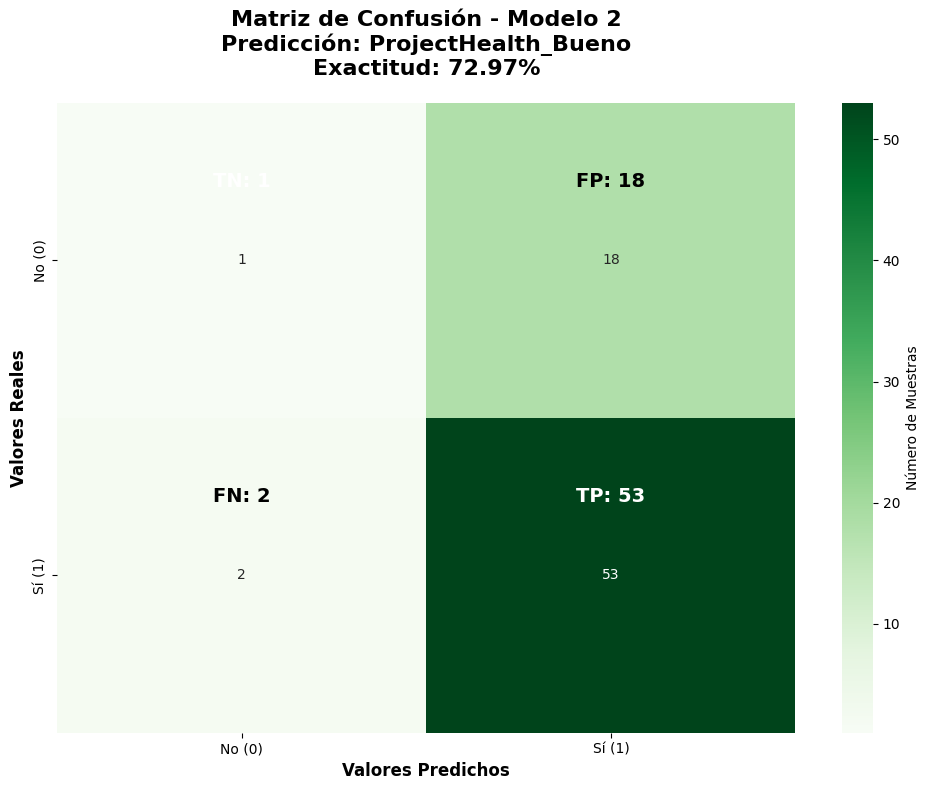

MÉTRICAS DEL MODELO 2 - ProjectHealth_Bueno:
•Variables Predictoras: Project manager, Project size , On-hold
•Exactitud: 72.97%
•Precisión: 74.65%
•Sensibilidad: 96.36%
•F1-Score: 84.13%


In [179]:
# MATRIZ DE CONFUSIÓN INDIVIDUAL - MODELO 2

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_2, annot=True, fmt="d", cmap="Greens", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TN: {True_Negatives_2:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_2:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_2:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TP: {True_Positives_2:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 2\nPredicción: ProjectHealth_Bueno\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test2, y_pred2)*100), fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

# Métricas del Modelo 2
print(f"MÉTRICAS DEL MODELO 2 - ProjectHealth_Bueno:")
print(f"•Variables Predictoras: Project manager, Project size , On-hold")
print(f"•Exactitud: {accuracy_score(y_test2, y_pred2)*100:.2f}%")
print(f"•Precisión: {precision_score(y_test2, y_pred2, average='binary', pos_label=1)*100:.2f}%")
print(f"•Sensibilidad: {recall_score(y_test2, y_pred2, average='binary', pos_label=1)*100:.2f}%")
print(f"•F1-Score: {f1_score(y_test2, y_pred2, average='binary', pos_label=1)*100:.2f}%")



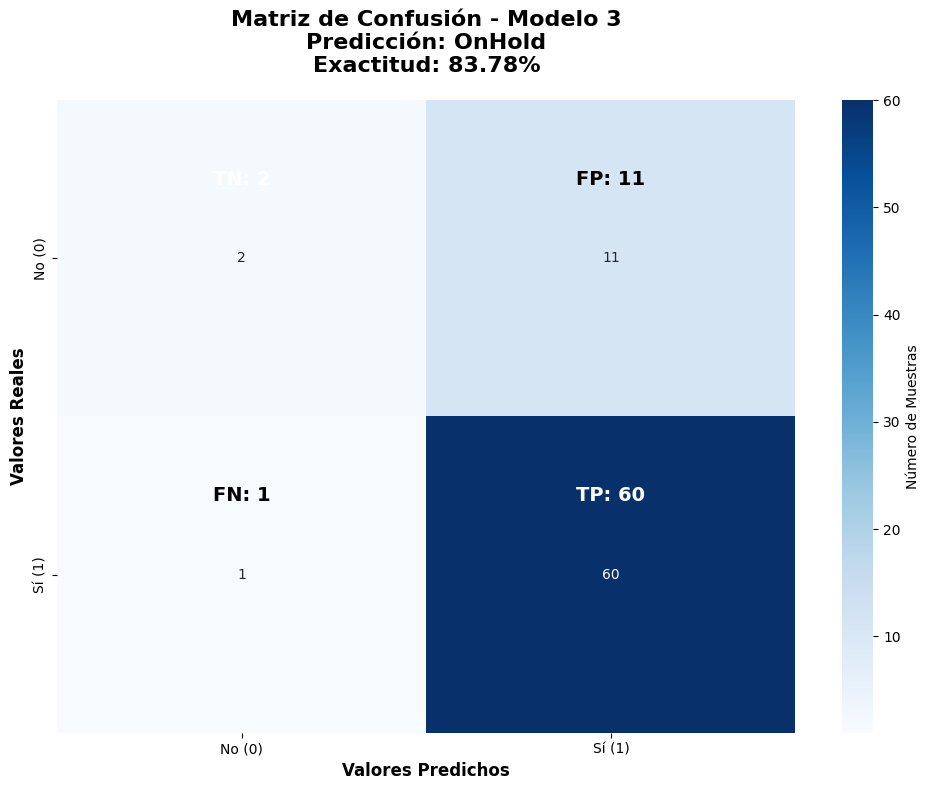

MÉTRICAS DEL MODELO 3 - OnHold:
•Variables predictoras: Project Type, Project manager, Project organization
•Exactitud: 83.78%
•Precisión: 84.51%
•Sensibilidad: 98.36%
•F1-Score: 90.91%


In [168]:
# MATRIZ DE CONFUSIÓN INDIVIDUAL - MODELO 3

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_3, annot=True, fmt="d", cmap="Blues", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TN: {True_Negatives_3:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_3:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_3:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TP: {True_Positives_3:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 3\nPredicción: OnHold\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test3, y_pred3)*100), fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

# Métricas del Modelo 3
print(f"MÉTRICAS DEL MODELO 3 - OnHold:")
print(f"•Variables predictoras: Project Type, Project manager, Project organization")
print(f"•Exactitud: {accuracy_score(y_test3, y_pred3)*100:.2f}%")
print(f"•Precisión: {precision_score(y_test3, y_pred3, average='binary', pos_label=1)*100:.2f}%")
print(f"•Sensibilidad: {recall_score(y_test3, y_pred3, average='binary', pos_label=1)*100:.2f}%")
print(f"•F1-Score: {f1_score(y_test3, y_pred3, average='binary', pos_label=1)*100:.2f}%")




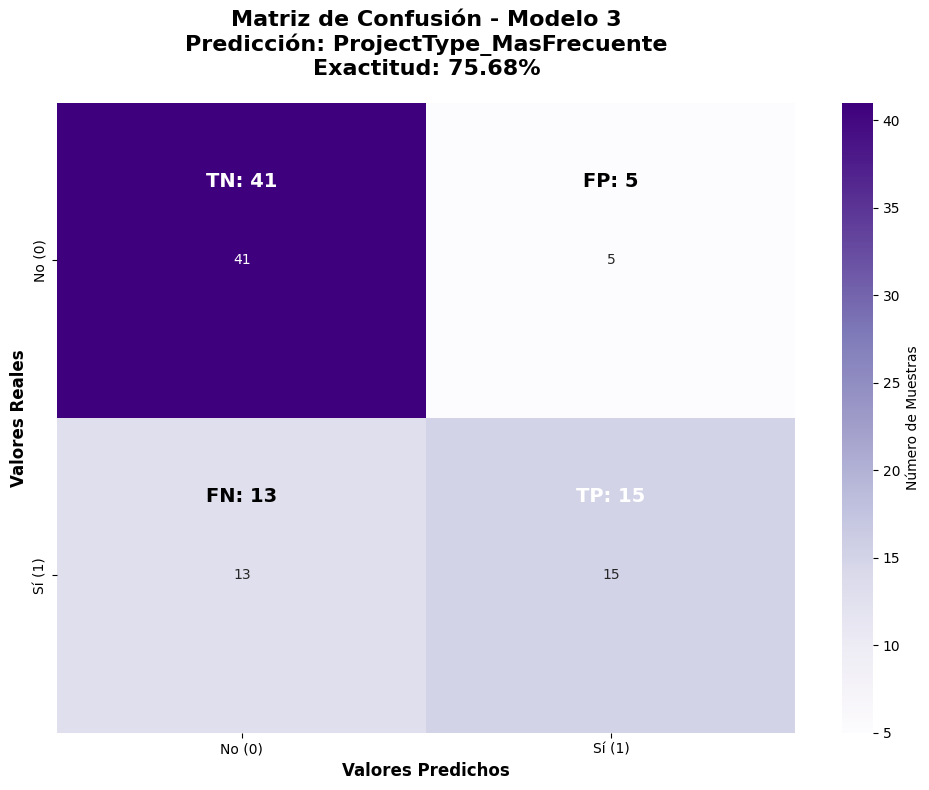

MÉTRICAS DEL MODELO 4 - ProjectType_MasFrecuente:
•Variables predictoras: Project Health, Project size, BG
•Exactitud: 75.68%
•Precisión: 75.00%
•Sensibilidad: 53.57%
•F1-Score: 62.50%


In [169]:
# MATRIZ DE CONFUSIÓN INDIVIDUAL - MODELO 4

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_4, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TN: {True_Negatives_4:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_4:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_4:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TP: {True_Positives_4:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 3\nPredicción: ProjectType_MasFrecuente\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test4, y_pred4)*100), fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

# Métricas del Modelo 3
print(f"MÉTRICAS DEL MODELO 4 - ProjectType_MasFrecuente:")
print(f"•Variables predictoras: Project Health, Project size, BG")
print(f"•Exactitud: {accuracy_score(y_test4, y_pred4)*100:.2f}%")
print(f"•Precisión: {precision_score(y_test4, y_pred4, average='binary', pos_label=1)*100:.2f}%")
print(f"•Sensibilidad: {recall_score(y_test4, y_pred4, average='binary', pos_label=1)*100:.2f}%")
print(f"•F1-Score: {f1_score(y_test4, y_pred4, average='binary', pos_label=1)*100:.2f}%")



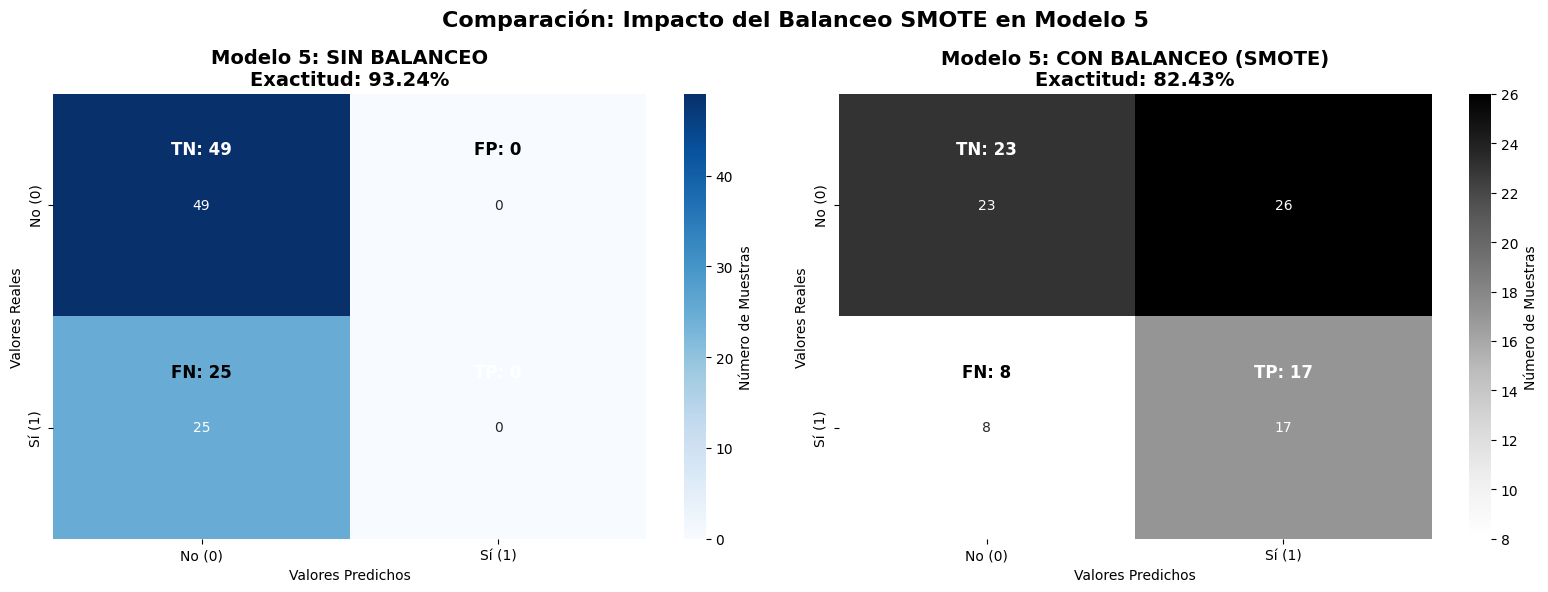

 ANÁLISIS DEL IMPACTO DEL BALANCEO: BG_MasFrecuente
•Variables predictoras: Project manager, Project organization, Project Type
• Sin balanceo - Exactitud: 66.22%
• Con balanceo - Exactitud: 54.05%
• Mejora en exactitud: -39.19 puntos porcentuales
• Sensibilidad sin balanceo: 0.00%
• Sensibilidad con balanceo: 68.00%


In [178]:
# COMPARACIÓN: MODELO 5 SIN BALANCEO vs CON BALANCEO

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Modelo 5 sin balanceo
sns.heatmap(matriz5, annot=True, fmt="d", cmap="Blues", ax=ax1,
            cbar_kws={'label': 'Número de Muestras'})
ax1.text(0.5, 0.25, f'TN: {True_Negatives_5:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax1.text(1.5, 0.25, f'FP: {False_positives_5:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax1.text(0.5, 1.25, f'FN: {False_Negatives_5:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax1.text(1.5, 1.25, f'TP: {True_Positives_5:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax1.set_title('Modelo 5: SIN BALANCEO\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test, y_pred)*100), fontsize=14, fontweight='bold')
ax1.set_xlabel('Valores Predichos')
ax1.set_ylabel('Valores Reales')
ax1.set_xticklabels(['No (0)', 'Sí (1)'])
ax1.set_yticklabels(['No (0)', 'Sí (1)'])

# Modelo 5 con balanceo
sns.heatmap(matriz_5_balanceado, annot=True, fmt="d", cmap="Greys", ax=ax2,
            cbar_kws={'label': 'Número de Muestras'})
ax2.text(0.5, 0.25, f'TN: {True_Negatives_5b:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax2.text(1.5, 0.25, f'FP: {False_positives_5b:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax2.text(0.5, 1.25, f'FN: {False_Negatives_5b:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax2.text(1.5, 1.25, f'TP: {True_Positives_5b:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax2.set_title('Modelo 5: CON BALANCEO (SMOTE)\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test, y_pred_over_sampling)*100), fontsize=14, fontweight='bold')
ax2.set_xlabel('Valores Predichos')
ax2.set_ylabel('Valores Reales')
ax2.set_xticklabels(['No (0)', 'Sí (1)'])
ax2.set_yticklabels(['No (0)', 'Sí (1)'])

plt.suptitle('Comparación: Impacto del Balanceo SMOTE en Modelo 5', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


print(" ANÁLISIS DEL IMPACTO DEL BALANCEO: BG_MasFrecuente")
print(f"•Variables predictoras: Project manager, Project organization, Project Type")
print(f"• Sin balanceo - Exactitud: {accuracy_score(y_test5, y_pred5)*100:.2f}%")
print(f"• Con balanceo - Exactitud: {accuracy_score(y_test5, y_pred_over_sampling5)*100:.2f}%")
print(f"• Mejora en exactitud: {(accuracy_score(y_test5, y_pred_over_sampling5) - accuracy_score(y_test, y_pred))*100:.2f} puntos porcentuales")
print(f"• Sensibilidad sin balanceo: {recall_score(y_test5, y_pred5, average='binary', pos_label=1)*100:.2f}%")
print(f"• Sensibilidad con balanceo: {recall_score(y_test5, y_pred_over_sampling5, average='binary', pos_label=1)*100:.2f}%")



